<a href="https://colab.research.google.com/github/evanurulpadilah/Tugas-UAS-_-PengolahanCitraDigital/blob/main/percobaan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import dataset melalui kaggle input**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                        480KB  2023-01-04 12:50:31           5071        178  1.0              
senapatirajesh/netflix-tv-shows-and-movies                      Latest Netflix TV shows and movies                  1MB  2023-01-14 17:03:12           1506         47  0.9411765        
johnny1994/divorce-rates-data-should-you-get-married            Divorce Rates Data: Should You Get Married?        22KB  2023-01-15 12:49:06            844         31  0.88235295       
rakkesharv/spotify-top-10000-streamed-songs                     Spotif

In [7]:
!kaggle datasets download -d "anefiamutiaraatha/dataset-tanaman-herbal"

100% 3.35G/3.35G [02:30<00:00, 24.4MB/s]
100% 3.35G/3.35G [02:30<00:00, 24.0MB/s]


In [8]:
import zipfile

In [9]:
dataset_zip = zipfile.ZipFile('dataset-tanaman-herbal.zip','r')
dataset_zip.extractall()
dataset_zip.close()

**import modul yang akan digunakan**

In [10]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import itertools

**mendeklarasikan path pada setiap data gambar yang akan digunakan**

In [11]:
X=[]
Z=[]
IMG_SIZE=224
Daun_Jambu_Biji='DATASET TANAMAN HERBAL/Data Training/Daun Jambu Biji'
Daun_Kari='DATASET TANAMAN HERBAL/Data Training/Daun Kari'
Daun_Kemangi='DATASET TANAMAN HERBAL/Data Training/Daun Kemangi'
Daun_Kunyit='DATASET TANAMAN HERBAL/Data Training/Daun Kunyit'
Daun_Mint='DATASET TANAMAN HERBAL/Data Training/Daun Mint'
Daun_Pepaya='DATASET TANAMAN HERBAL/Data Training/Daun Pepaya'
Daun_Sirih='DATASET TANAMAN HERBAL/Data Training/Daun Sirih'
Daun_Sirsak='DATASET TANAMAN HERBAL/Data Training/Daun Sirsak'
Lidah_Buaya='DATASET TANAMAN HERBAL/Data Training/Lidah Buaya'
Teh_Hijau='DATASET TANAMAN HERBAL/Data Training/Teh Hijau'

**membuat variable**

In [12]:
def assign_label(img,tanaman_herbal):
    return tanaman_herbal

**memberikan label pada data dan menyatukan data menjadi path**

In [13]:
def make_train_data(tanaman_herbal,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,tanaman_herbal)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

**membuat train data path dan penamaan**

In [14]:
make_train_data('Daun Jambu Biji',Daun_Jambu_Biji)
print(len(X))

100%|██████████| 80/80 [00:22<00:00,  3.50it/s]

80


In [15]:
make_train_data('Daun Kari',Daun_Kari)
print(len(X))

100%|██████████| 80/80 [00:24<00:00,  3.26it/s]

160


In [16]:
make_train_data('Daun Kemangi',Daun_Kemangi)
print(len(X))

100%|██████████| 80/80 [00:12<00:00,  6.45it/s]

240


In [17]:
make_train_data('Daun Kunyit',Daun_Kunyit)
print(len(X))

100%|██████████| 80/80 [00:23<00:00,  3.39it/s]

320


In [18]:
make_train_data('Daun Mint',Daun_Mint)
print(len(X))

100%|██████████| 80/80 [00:01<00:00, 59.37it/s]

400


In [19]:
make_train_data('Daun Pepaya',Daun_Pepaya)
print(len(X))

100%|██████████| 80/80 [00:23<00:00,  3.43it/s]

480


In [20]:
make_train_data('Daun Sirih',Daun_Sirih)
print(len(X))

100%|██████████| 80/80 [00:13<00:00,  6.05it/s]


560


In [21]:
make_train_data('Daun Sirsak',Daun_Sirsak)
print(len(X))

100%|██████████| 80/80 [00:24<00:00,  3.30it/s]

640


In [22]:
make_train_data('Lidah Buaya',Lidah_Buaya)
print(len(X))

100%|██████████| 80/80 [00:22<00:00,  3.62it/s]

720


In [23]:
make_train_data('Teh Hijau',Teh_Hijau)
print(len(X))

100%|██████████| 80/80 [00:01<00:00, 58.81it/s]

800


**menampilkan data gambar secara acak beserta nama tanaman herbal**

In [24]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(20,20)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Tanaman Herbal: '+Z[l])
        
plt.tight_layout()

**membuat label kode untuk setiap variable**

In [26]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
X=np.array(X)
X=X/255

**membagi dataset menjadi data pelatihan dan data test**

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

**mengambil data secara acak(random) untuk data train dan test**

In [28]:
np.random.seed(10)
rn.seed(10)
tf.random.set_seed(10)

**membangun model data Convolutional Neural Network untuk Sequential tabel**

In [29]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (17,17),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

**membuat val akurasi untuk epoch data**

In [30]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

**membuat datagen untuk augmentasi data**

In [31]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

**memberi keterangan untuk loss akurasi dan metrics akurasi**

In [32]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

**melakukan proses pelatihan data dengan model.fit_generator**

In [33]:
batch=20
epoch=80
step = np.ceil(x_train.shape[0]/batch)
History = model.fit_generator(
    datagen.flow(x_train,y_train, batch_size=batch),
    epochs = epoch,
    validation_data = (x_test,y_test),
    verbose = 1,
    steps_per_epoch=step
)

Epoch 1/80
30/30 [==============================] - 18s 243ms/step - loss: 2.3049 - accuracy: 0.0933 - val_loss: 2.3050 - val_accuracy: 0.0800
Epoch 2/80
30/30 [==============================] - 6s 213ms/step - loss: 2.3024 - accuracy: 0.1067 - val_loss: 2.3075 - val_accuracy: 0.0800
Epoch 3/80
30/30 [==============================] - 6s 215ms/step - loss: 2.2866 - accuracy: 0.1383 - val_loss: 2.2499 - val_accuracy: 0.1150
Epoch 4/80
30/30 [==============================] - 6s 214ms/step - loss: 1.9995 - accuracy: 0.2400 - val_loss: 1.8413 - val_accuracy: 0.2000
Epoch 5/80
30/30 [==============================] - 6s 214ms/step - loss: 1.8127 - accuracy: 0.3017 - val_loss: 1.7783 - val_accuracy: 0.2800
Epoch 6/80
30/30 [==============================] - 7s 219ms/step - loss: 1.7736 - accuracy: 0.3217 - val_loss: 1.6731 - val_accuracy: 0.3100
Epoch 7/80
30/30 [==============================] - 6s 215ms/step - loss: 1.7258 - accuracy: 0.3650 - val_loss: 1.6512 - val_accuracy: 0.3500
Epoch

**menyimpan hasil model kedalam format h5**

In [34]:
model.save('/kaggle/working/Tanaman_Herbal.h5')

**mengkonversikan model h5 ke tflite**

In [35]:
saved_model_dir = '/kaggle/working/'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

target_names = ['Daun Jambu Biji','Daun Kari','Daun Kemangi','Daun Kunyit','Daun Mint','Daun Pepaya','Daun Sirih','Daun Sirsak','Lidah Buaya','Teh Hijau']
labels = '\n'.join(target_names)

with open('labels.txt', 'w') as f:
  f.write(labels)

**menampilkan arsitektur model squential tabel**

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      27776     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)       0

**menampilkan confusion matrix**

In [37]:
Y_pred = model.predict_generator(x_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 9  0  0  0  0  0  0  5  0  0]
 [ 0 14  0  0  0  3  0  1  0  1]
 [ 0  0 19  0  3  0  0  0  0  5]
 [ 6  0  0 17  0  0  3  1  1  0]
 [ 0  0  2  2 10  0  0  1  0  2]
 [ 0  0  0  0  0 22  1  0  0  0]
 [ 1  0  0  1  0  0 20  0  0  0]
 [ 0  0  0  1  0  0  0 17  0  0]
 [ 0  0  3  2  0  0  0  0 11  0]
 [ 0  0  2  0  2  0  0  0  1 11]]


**menampilkan classification report**

In [38]:
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Daun Jambu Biji       0.56      0.64      0.60        14
      Daun Kari       1.00      0.74      0.85        19
   Daun Kemangi       0.73      0.70      0.72        27
    Daun Kunyit       0.74      0.61      0.67        28
      Daun Mint       0.67      0.59      0.62        17
    Daun Pepaya       0.88      0.96      0.92        23
     Daun Sirih       0.83      0.91      0.87        22
    Daun Sirsak       0.68      0.94      0.79        18
    Lidah Buaya       0.85      0.69      0.76        16
      Teh Hijau       0.58      0.69      0.63        16

       accuracy                           0.75       200
      macro avg       0.75      0.75      0.74       200
   weighted avg       0.76      0.75      0.75       200



**menampilkan confusion matrix dalam bentuk tabel**

In [39]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix


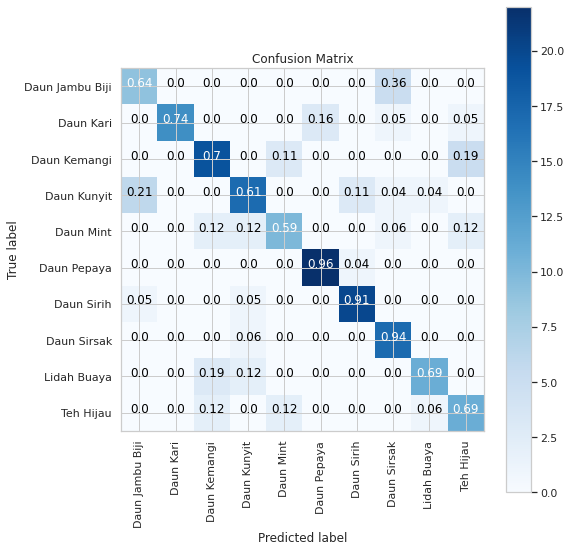

In [40]:
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

**membuat ulang variabel untuk model format h5**

In [41]:
new_model = tf.keras.models.load_model('/kaggle/working/Tanaman_Herbal.h5')

**menampilkan arsitektur model squential tabel**

In [42]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      27776     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)       0

**menampilkan grafik loss**

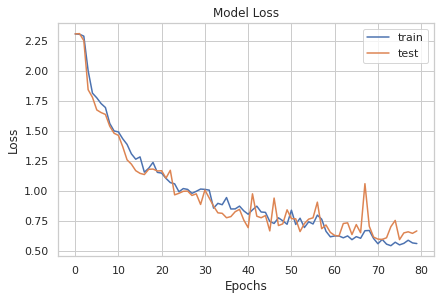

In [43]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

**menampilkan grafik accuracy**

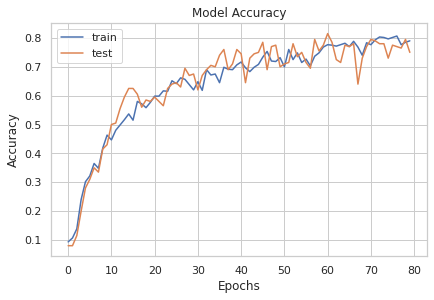

In [44]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

**membentuk variabel untuk mendapatkan prediksi**

In [45]:
pred=new_model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

7/7 [==============================] - 0s 44ms/step


**menyimpan beberapa index yang salah diklasifikasikan**

In [46]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

**memanggil dan test data gambar**

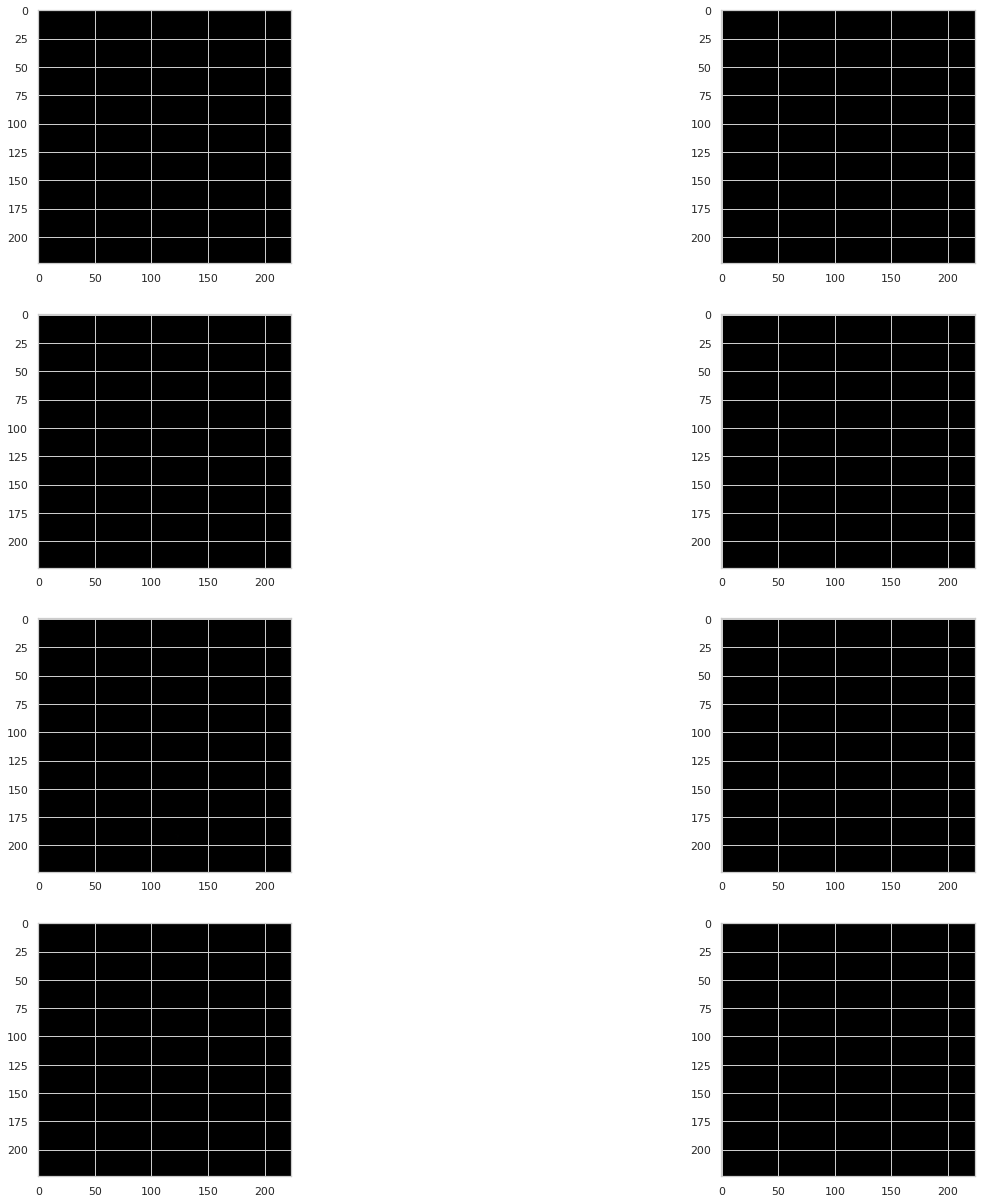

In [48]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(20,20)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
      
        count+=1

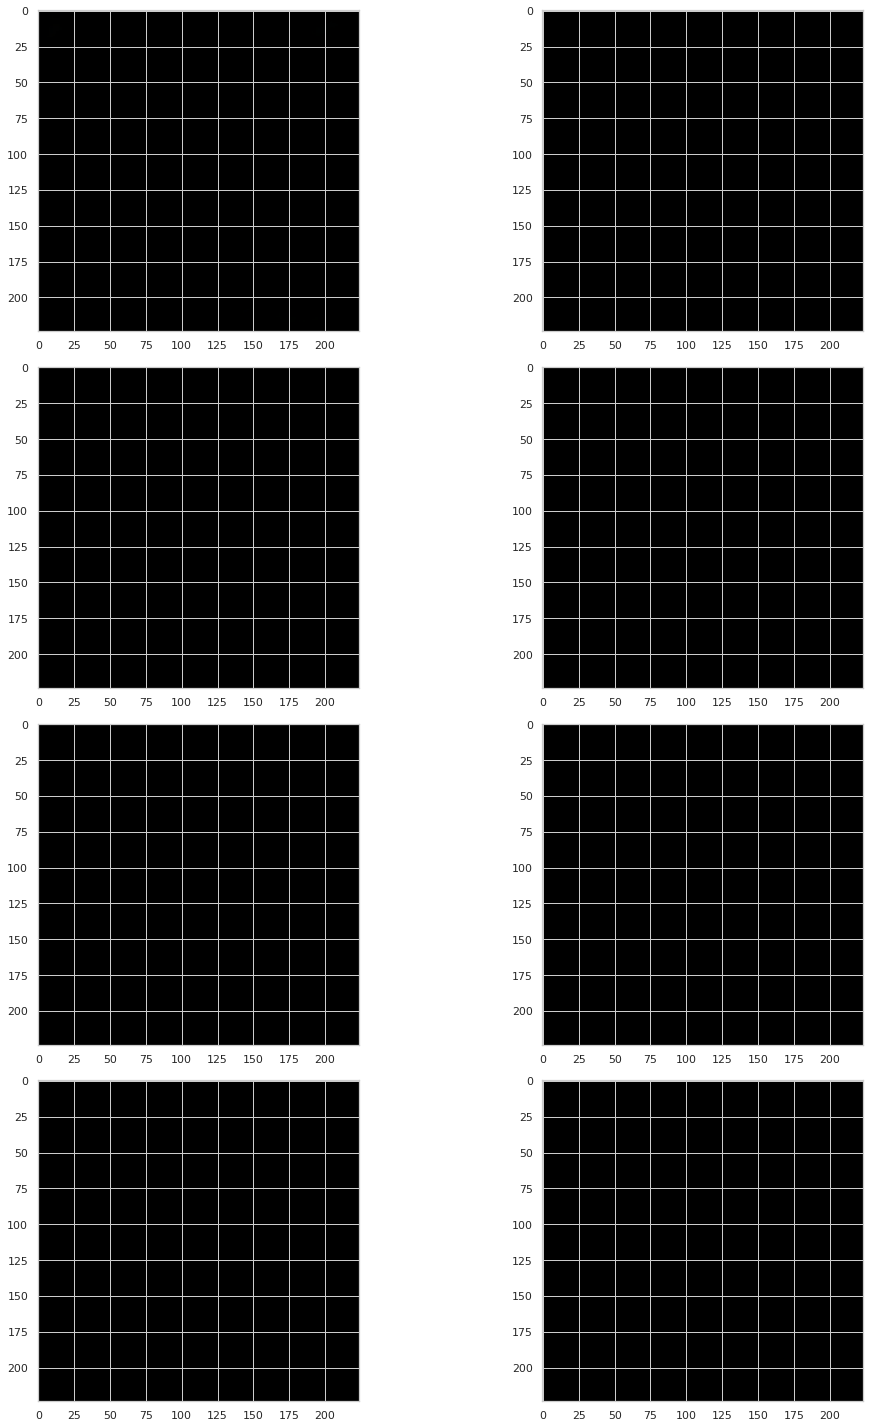

In [49]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(20,20)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        plt.tight_layout()
        count+=1

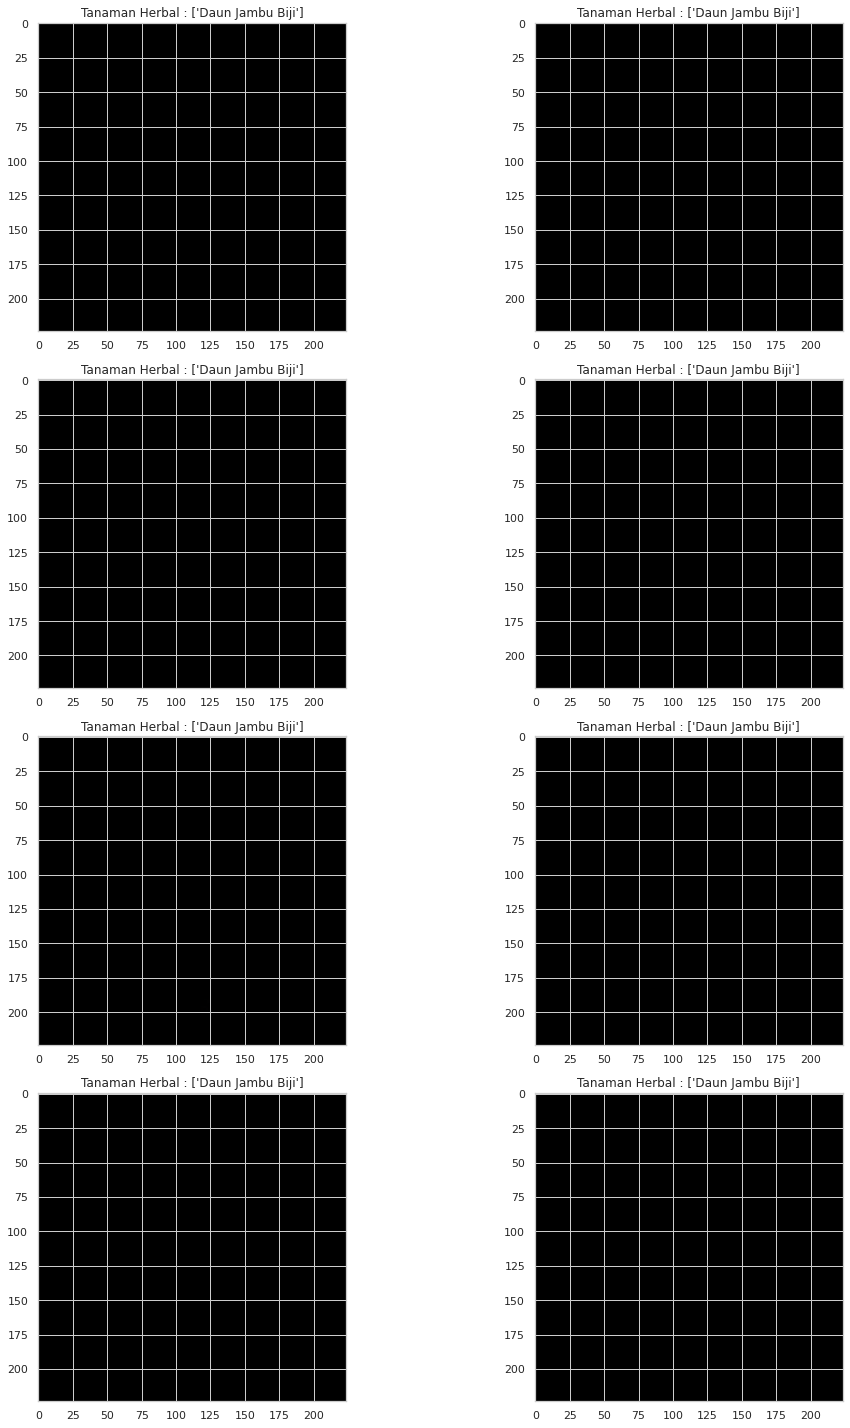

In [50]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(20,20)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Tanaman Herbal : "+str(le.inverse_transform([pred_digits[prop_class[count]]])))
        plt.tight_layout()
        count+=1

**Memberikan akurasi dan loss ke data model alias**

In [51]:
#new_model.fit(x_train,y_train,epochs=epoch,batch_size=batch,validation_data = (x_test,y_test))